In [ ]:
#risk= M1*speed+M2*car_age+M3*experience+intercept
#Y=M1*X1+M@*X2+.....+C

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [7]:
df=pd.read_csv("carisk.csv")
df.head(len(df))

,speed,car_age,experience,risk
0,200,15,5.0,85
1,90,17,13.0,20
2,165,12,4.0,93
3,110,20,NaN,60
4,140,5,3.0,82
5,115,2,8.0,10


In [6]:
df.experience # there is a null value we have to handle it by mean or median

0     5.0
1    13.0
2     4.0
3     NaN
4     3.0
5     8.0
Name: experience, dtype: float64

In [9]:
df.experience.mean() #vvi here we 6 value but the mean is for 5 values null one ingnored

6.6

In [11]:
exp_fit=df.experience.median()
exp_fit

5.0

In [13]:
df.experience=df.experience.fillna(exp_fit)
df.experience

0     5.0
1    13.0
2     4.0
3     5.0
4     3.0
5     8.0
Name: experience, dtype: float64

In [14]:
df

,speed,car_age,experience,risk
0,200,15,5.0,85
1,90,17,13.0,20
2,165,12,4.0,93
3,110,20,5.0,60
4,140,5,3.0,82
5,115,2,8.0,10


In [16]:
reg=linear_model.LinearRegression()

In [18]:
reg.fit(df[['speed','car_age','experience']],df.risk)

LinearRegression()

In [20]:
reg.predict([[160,10,5]])

C:\Users\power\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([71.37146872])

In [21]:
reg.coef_

array([ 0.33059217,  1.61053246, -6.20772074])

In [22]:
reg.intercept_

33.410000910435905

In [23]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

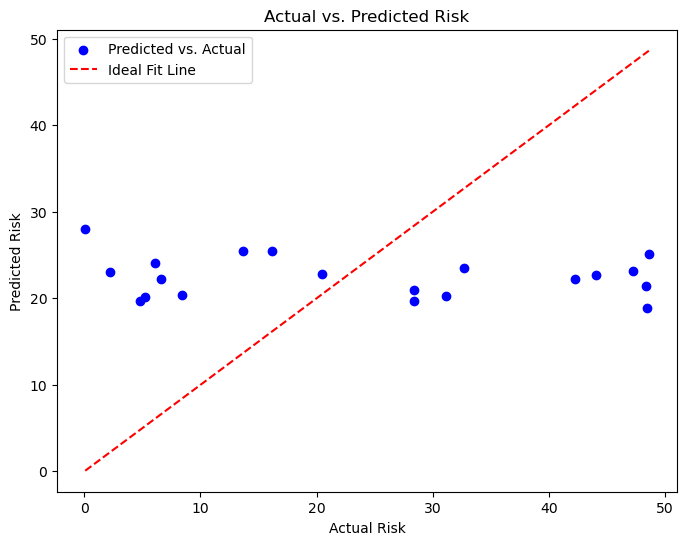

In [24]:
data = pd.DataFrame({
    'speed': np.random.rand(100) * 100,
    'car_age': np.random.rand(100) * 10,
    'experience': np.random.rand(100) * 20,
    'risk': np.random.rand(100) * 50
})

# Splitting data into features and target
X = data[['speed', 'car_age', 'experience']]
y = data['risk']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict risk values for test data
y_pred = model.predict(X_test)

# Plotting Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit Line')
plt.xlabel('Actual Risk')
plt.ylabel('Predicted Risk')
plt.title('Actual vs. Predicted Risk')
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate R-squared, MSE, and MAE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R-squared (R2):", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

R-squared (R2): -0.0792322020323517
Mean Squared Error (MSE): 326.831405757687
Mean Absolute Error (MAE): 16.476514108476273
